In [ ]:
# System Libraries
import importlib, sys, os
import numpy as np

# TensorFlow Libraries
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
from tensorflow import keras
import tensorflow as tf

# User Libraries
sys.path.append("../")
from modules import common, chapter_01, chapter_08

# Reload Libraries
importlib.reload(chapter_01)
importlib.reload(chapter_08)
importlib.reload(common)

# Check GPU
print(tf.config.list_physical_devices())

# Module variables
batch_size = 512
epochs = 10

**Convnet**

In [ ]:
i = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", strides=1, activation=tf.nn.relu)(i)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", strides=1, activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", strides=1, activation=tf.nn.relu)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=10, activation=tf.nn.softmax)(x)
model = keras.Model(inputs=i, outputs=o)

**Mnist using Convnet**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
i = keras.Input(shape=(28, 28, 1))
x = keras.layers.Rescaling(1.0 / 255)(i)
x = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=10, activation=tf.nn.softmax)(x)
model = keras.Model(inputs=i, outputs=o)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.001),
)
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_sparse_categorical_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        monitor="val_loss",
        filepath="../resources/models/tmp/model.keras",
        save_best_only=True,
    ),
    keras.callbacks.TensorBoard(log_dir="../resources/logs"),
]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    callbacks=callbacks,
    batch_size=512,
    verbose=False,
    epochs=10,
)
common.plot(data=[history], labels=["mnist conv"])

---
# **Kaggle Cats and Dogs**
---

**Dataset**

In [ ]:
new_base_dir, train_dataset, val_dataset, test_dataset = chapter_08.dataset_batches()

**Without Augmentation**

In [ ]:
i = keras.Input(shape=(180, 180, 3))
x = keras.layers.Rescaling(1.0 / 255)(i)
x = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=1, activation=tf.nn.sigmoid)(x)
model = keras.Model(inputs=i, outputs=o)

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        monitor="val_loss",
        filepath="../resources/models/tmp/model.keras",
        save_best_only=True,
    ),
    keras.callbacks.TensorBoard(log_dir="../resources/logs"),
]
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
)
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=512,
    callbacks=callbacks,
    verbose=False,
)

**With augmentation**

In [ ]:
augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomZoom(0.2),
        keras.layers.RandomRotation(0.1),
    ]
)
i = keras.Input(shape=(180, 180, 3))
x = augmentation(i)
x = keras.layers.Rescaling(1.0 / 255)(i)
x = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=1, activation=tf.nn.sigmoid)(x)
model = keras.Model(inputs=i, outputs=o)

**With Feature Extraction without augmentation**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(180, 180, 3),
)
conv_base.trainable = False

In [ ]:
features, labels = [], []
for images_batch, labels_batch in train_dataset:
    processed_batch = keras.applications.vgg16.preprocess_input(images_batch)
    features_batch = conv_base.predict(x=processed_batch)
    features.append(features_batch)
    labels.append(labels_batch)
features, labels = np.concatenate(features), np.concatenate(labels)

In [23]:
i = keras.Input(shape=(5, 5, 512))
x = keras.layers.Flatten()(i)
x = keras.layers.Dense(units=256, activation=None)(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=1, activation=tf.nn.sigmoid)(x)
model = keras.Model(inputs=i, outputs=o)

**With Feature Extraction with augmentation**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
)
conv_base.trainable = False

In [30]:
i = keras.Input(shape=(180, 180, 3))
x = augmentation(i)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=256, activation=None)(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=1, activation=tf.nn.sigmoid)(x)
model = keras.Model(inputs=i, outputs=o)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_5  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_5 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 12800)             0  

**Finetuning**

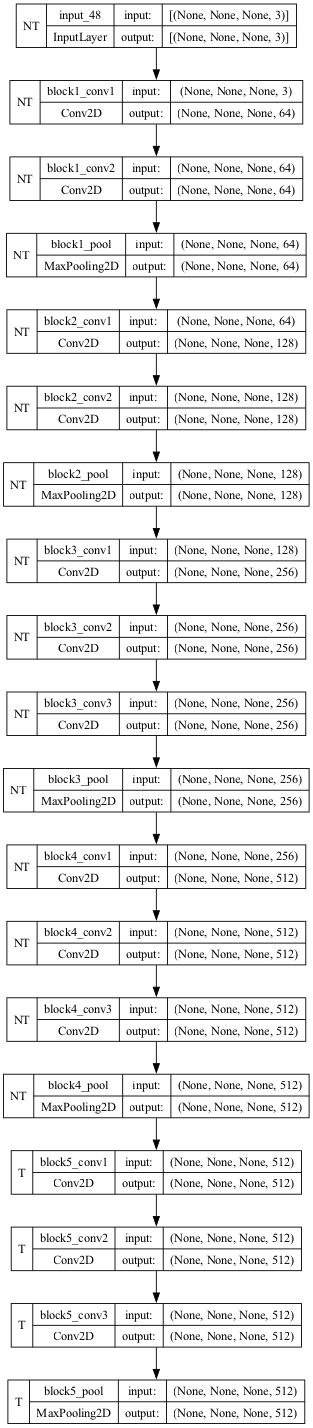

In [45]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
)
for layer in conv_base.layers[:-4]:
    layer.trainable = False

i = keras.Input(shape=(180, 180, 3))
x = augmentation(i)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=256, activation=None)(x)
x = keras.layers.Dropout(rate=0.5)(x)
o = keras.layers.Dense(units=1, activation=tf.nn.sigmoid)(x)
model = keras.Model(inputs=i, outputs=o)
keras.utils.plot_model(
    conv_base,
    "../resources/images/tmp/model.png",
    show_shapes=True,
    show_trainable=True,
    dpi=64,
)